<div style="text-align: right"> Christopher Hyek </div>
<div style="text-align: right"> 5/16/2019 </div>
<h1 align="center"> Module 1 Project </div>
<h2 align="center"> King County Data Modelling </div>

# Introduction

[**Project and Goals**](#Project)

[**Methodology**](#Methodology)

[**Outline**](#Outline)
* [Obtain](#Obtain)
* [Cleaing/Scrubbing](#Cleaning)
* [EDA](#EDA)
    * [Question 1](#Question_1)
        * Visualization
        * Models
        * Recommendation
    * [Question 2](#Question_2)
        * Visualization
        * Models
        * Recommendation    
    * [Question 3](#Question_3)
         * Visualization
         * Models
         * Recommendation   
* [Conclusion](#Conclusion)

In [1]:
cd

C:\Users\Atlas


In [2]:
cd dsc-1-final-project-online-ds-ft-041519/

C:\Users\Atlas\dsc-1-final-project-online-ds-ft-041519


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from itertools import combinations
from sklearn.metrics import r2_score

from scipy.stats import zscore

# Project

This is the Module 1 project of Flat Iron and we are tasked with modifying a Kaggle dataset relating to King County's Housing.

# Methodology

The dataset has problems with it that will have us do OSEMN on it. I'll be obtaining, scrubbing, exploring/visualizing, modeling, and interpretting the dataset. This will lead me to answers to give to both technical and non-technical reviewers. 

# Outline

The following sections will provide my OSEMN method and provide my thoughts and observations along the way as I get through the module.

## Obtain

### Initial Findings
Based on initial results I know that there is quite a lot of columns since the column "..." is in the middle of the page and I know that there should be 21597 points of data per column (from 0 to 21596), but a few of thsee columns look to be labeled oddly so I'll use df.info() for more information.

In [4]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


### Column Names and Meaning
Luckily there is already a name and list for all of the columns found in column_names.md so I'll copy paste the list below:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

It looks like a couple of these columns are very closely named but have very different representations so I will be needing to make sure to properly check each time I reference one of those columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Curosry review of the columns
List of things that are not what they seem:
*    **id** - listed as int64 due to it being a name of numbers identifying it but this is not the right type.
*   **bedrooms** - listed as int64 due to the bedrooms probably being 1, 2, 3, 4+ or something like that but this is categorical data and I should make a note of that.
*    **bathrooms** - listed as float64 probably due to the naming convention of 1.5 bathroom, there is probably no other floats but the '.5' ones.
*    **floors** - this one is confusing as to why it's a float so I will dig deeper.
*    **waterfront** - I assume this will be boolean style data. It is also missing about 2376 data values.
*    **view** - I was initially confused by this column but after checkign the .md file I found out its true meaning.
*    **condition** - is also categorical data
*    **grade** - I'm pretty sure it is categorical data but it ranges from 0 to over 16.
*    **sqft_basement** - It is a string list when it should be listing numbers only so I will check for typos and recategorize it.
*    **yr_built** - While not technically data points it is in the same field as date so I will need to recategorize it.
*    **yr_renovated** - Missing thousands of values, it is also a float for some reason when years are not float values.

## Cleaning

For the scrubbing it is important to recognize and check your data for some of the more common problems that it has.

### Categorizing the problems
Based on my first interpretations of the data I have sorted out what I think are issues:
* **Inconsistent Column Names:** None
* **Missing/Incorrect Data:** waterfront, view, yr_renovated, sqft_basement
* **Different Data Types:** id, bedrooms, bathrooms, floors(?), view, condition, grade, sqft_basement, yr_renovated, zipcode
* **Duplicate Rows:** None

### Inconsistent Column Names
There are no inconsistent names or additional spaces or marks in the names so this is good.

### Missing data
Below I use the isna().sum() to check to be sure that the columns missing data are for sure the only ones.

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df['waterfront'].unique()

array([nan,  0.,  1.])

Since the information is categorical in that it is either 0 (or does not have a waterfront) or 1 (it does have a waterfront) then it would be reasonable that the people filling in the data that omitted information would be ones that do not have waterfront properties either. So we'll be writing some code to change the NaN values to '0' so that the data comes back as one or the other. 

In [9]:
df['waterfront'] = df['waterfront'].fillna(0)

In [10]:
df['waterfront'].unique()

array([0., 1.])

Now that the data for the waterfront property is either 0 or 1 it makes it so that the data is fairly clean for this column and we'll move on to the other columns that are missing values.

In [11]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

For years renovated there is actually two values we have that are odd at first and that is the '0' and the NaN values. The '0' one just means that there are houses that are not renovated but the NaN also means that and is just not indicating it.

In [12]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [13]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Now the data is stored as either '0' meaning that there was no renovation or a number indicating the year that it was renovated. 

In [14]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [15]:
df['view'] = df['view'].fillna(0)

In [16]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

Now the values are showing up as either '0', implying nobody has viewed the house or values higher based on the number of people who have viewed the house. This is another case where the NaN values are just ones that were not filled in '0' values. So we're going to do the same thing as we did above.

While the cursory review did not catch this columns problem, checking it's type did. The primary issue for this column is that there is a '?' value and there are quite a few of them. To fix this issue I decided to change the '?' to '0.0'. While it would be better to have those '?' values be replaced by the mean of the data not including '0.0' it is not relevant to the questions prepared.

In [17]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [18]:
df2 = df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0.0'

In [19]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

I have to admit this took longer to do than I had hoped it would. I was quite rusty with iloc and loc before so I had to constantly try new ways to get the '?' values to become something else. I had wanted to make it so the original '0.0' values before I converted the '?' values to that were dropped and then to convert the '?' to NaN values so I could take the .namean() and then store that mean in a cell so that I can then return to the original values before dropping the '0.0' and to then just change the '?' to that mean but it was causing me to lose focus on what questions I have preppared.

### Different Data Types

Doing a cursory look over the data we'll make sure that we have the columns properly typed. Below are a few that I noticed when I was checking the info tab.

In [20]:
df[['id', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated', 'zipcode']].head()

,id,bedrooms,bathrooms,floors,view,condition,grade,sqft_basement,yr_renovated,zipcode
0,7129300520,3,1.00,1.0,0.0,3,7,0.0,0.0,98178
1,6414100192,3,2.25,2.0,0.0,3,7,400.0,1991.0,98125
2,5631500400,2,1.00,1.0,0.0,3,6,0.0,0.0,98028
3,2487200875,4,3.00,1.0,0.0,5,7,910.0,0.0,98136
4,1954400510,3,2.00,1.0,0.0,3,8,0.0,0.0,98074


ID is definitely only meant to be an identifying tool and is not actual data.

In [21]:
df['id'] = df['id'].astype(str)

Bedrooms has a large sample variance, I would assume 33 is a typo but 11 and 10 seem to be legitimate.

In [22]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

After doing some research on bathrooms I have found out that .25, .5, and .75 bathrooms exist and are very much reasonable responses. 

In [23]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

I have also learned that cielings that are not the full size count as .5 floors which make this data also reasonable.

In [24]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

The view data means the number of people viewing it so that means the NaN data values really just mean 0 views so I changed them to that in the Missing Value segment.

In [25]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

This is definitely categorical data from 1 to 5, like a star scale.

In [84]:
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [83]:
df['condition'].astype(np.int64)

0        3
1        3
2        3
3        5
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       4
12       4
13       4
14       3
15       3
16       3
17       4
18       4
19       4
20       4
21       3
22       3
23       3
24       4
25       5
26       3
27       5
28       3
29       3
        ..
21567    4
21568    3
21569    3
21570    3
21571    3
21572    3
21573    3
21574    3
21575    3
21576    3
21577    3
21578    3
21579    3
21580    3
21581    3
21582    3
21583    3
21584    3
21585    3
21586    3
21587    3
21588    3
21589    3
21590    3
21591    3
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21597, dtype: int64

The grading system seems to based on the King County Grade system which is categorical data. We'll change this to integer data.

In [27]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

Since we already cleaned out the '?' values from sqft_basement, now all we need to do is to make the column an int64 to remain consistent with the other columns that are taking similar data.

In [28]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [29]:
df['sqft_basement'] = df['sqft_basement'].astype(np.float64)
df['sqft_basement'] = df['sqft_basement'].astype(np.int64)

In [30]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

There doesn't seem to be any issue with the zipcodes so I think this is good to go.

In [31]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

Let's check out what the end result of these changes has done to the overall information.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.1+ MB


ID and sqft_basement are now properly typed and all of the other reviewed columns were correct after checking them.

### Repeated Columns
There are none but there are a few that share similar data so be careful with the naming conventions.

# EDA

Now it is time to explore the processed data and to come up with meaningful questions to ask and to solve for. First we'll describe our data and see what the comes up with.

In [33]:
np.round(df.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,286.0,1971.0,69.0,98078.0,48.0,-122.0,1987.0,12758.0
std,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,440.0,29.0,364.0,54.0,0.0,0.0,685.0,27274.0
min,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


We'll also be dropping the ID and the Date data columns since they're objects and we don't want that messing anything up for us.

In [34]:
df = df.drop(['id', 'date'], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


First thing we are going to do is get a scatter matrix of the data and see if we can spot anything interesting out the gate before doing a heatmap. The more diagonal the data the more positively they correlate and those will be the ones we try to focus in on. 

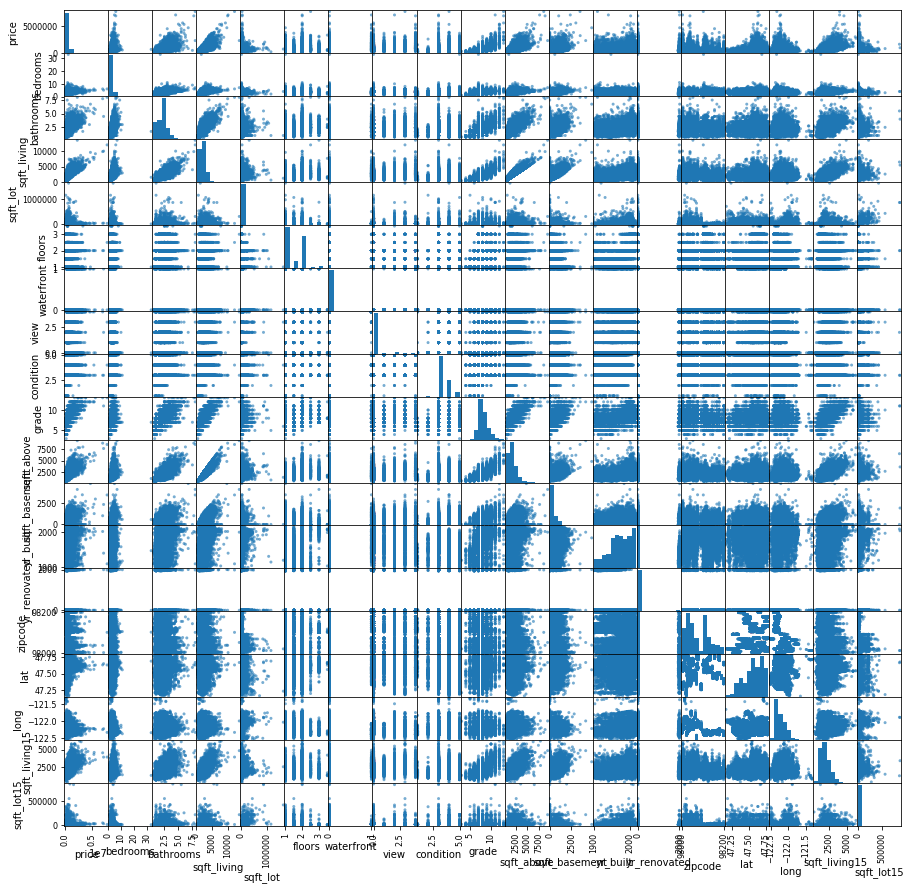

In [36]:
pd.plotting.scatter_matrix(df, alpha=0.6, figsize=(15, 15))
plt.show()

The heatmap is a great tool for us to see the correlations far better and with numeric values over say the scater matrix but between the two of them we will be able to form some meaningful questions and prove/disprove trends found to realtors.

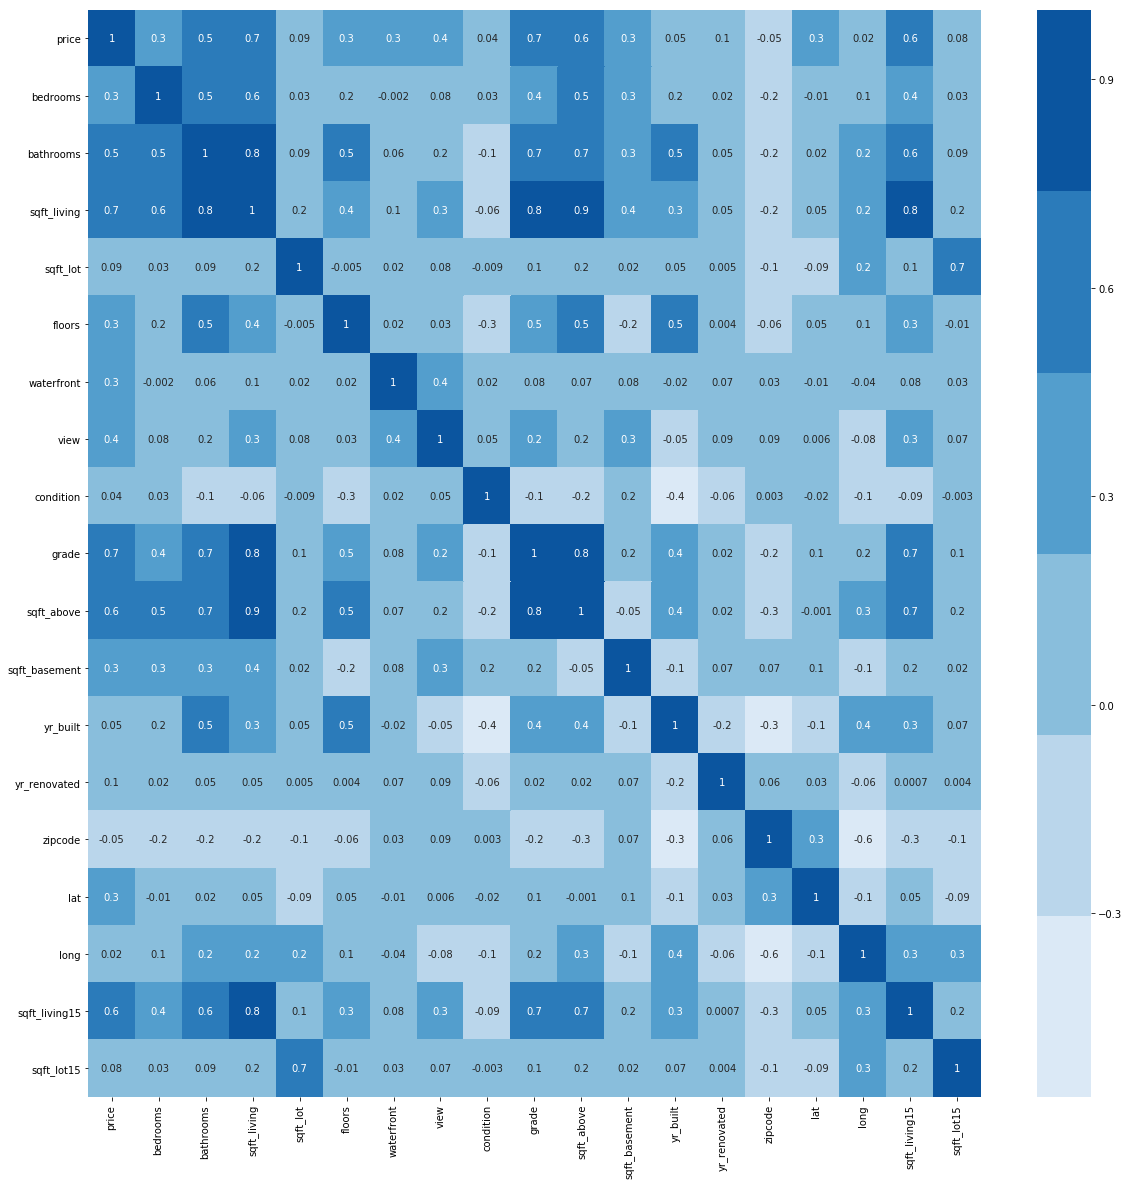

In [37]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sb.heatmap(corr, annot=True, fmt='0.1g', cmap=sb.color_palette('Blues'))
plt.show()

# Question_1

## What relationship is shared between the year the house was built and it's grade?

While the information from the heatmap shows that it is data that doesn't share a very high correlation, a common misconception that I felt would be a good thing to clear up with the data is that older houses are not always the ones that are the ones kept in the best condition. And that what you typically see representing this on mass media is the exception and not the normal.

### Visualization
The first thing to note with this question is that both of these variables are categorical, so the type of visualization that will be preppared is going to be a violin plot which expresses the categories better.

With that in mind I hypothesize that the data would tend to have newer houses having a better housing grade simply because housing codes would be more strict on them. Let's see what the figure holds for this data.

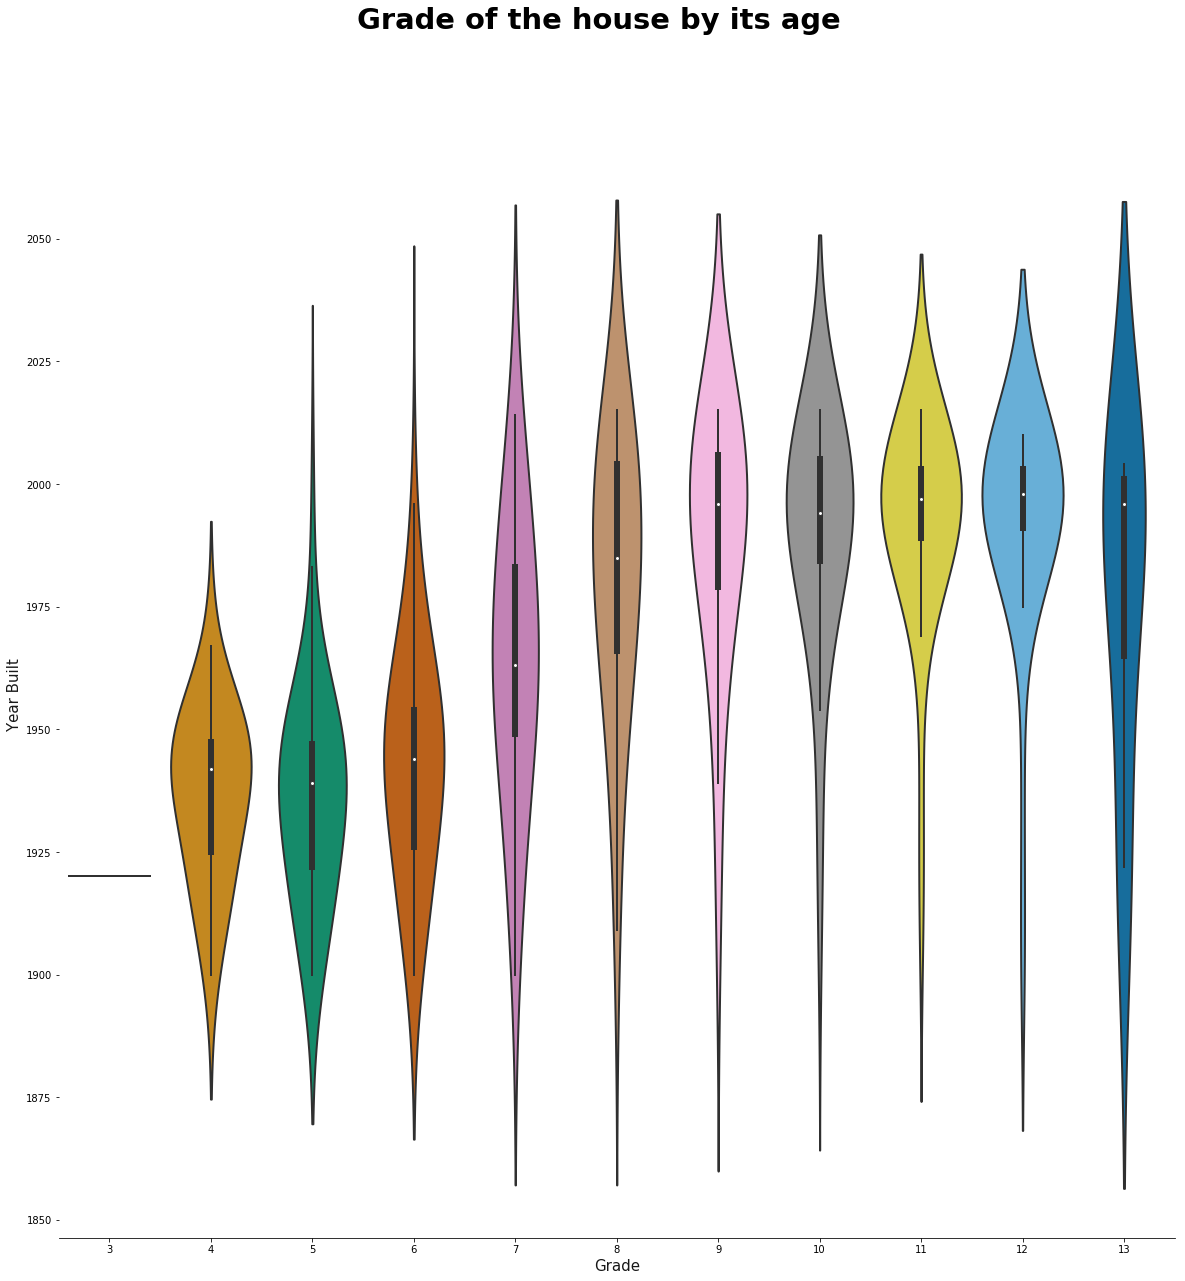

In [38]:
f, ax = plt.subplots(figsize=(20,20))
# sb.set(style='whitegrid', palette='colorblind')
sb.violinplot(y="yr_built", x="grade", data=df, palette='colorblind', bw=.8, linewidth=2)
sb.despine(left=True)
f.suptitle('Grade of the house by its age', fontsize=29, fontweight='bold')
ax.set_xlabel('Grade', size = 15, alpha=.9)
ax.set_ylabel('Year Built', size = 15, alpha=.9)
# vp.set_axis_labels('grade', 'Year Built')
plt.show()

What is interesting about our data initially is that there is no grade below a 3 in our data set so we really only deal with houses from the lower mid thru high tiers. But it seems based on the data distribution that the older the home is the more houses on average have lower grades as shown by grade 4 thru 6 having a majority of their values before 1960. Then the grade 7 data is the bridge between the two major gaps as it covers houses between the 1960's thru the 1980's and is in the middle of the grading scale too. Then the 1980's thru the 2010's is where almost all of the higher grade homes exist. It isn't until you get to the grade 13 houses that the data takes a shift again and begins to skew further towards older homes.

The skew that the data takes in the grade 13 category does fall in line with the common misconception that older houses tend to be the most taken care of since there are some outliers that span all the way back to the early 1920's in that category but the majority of the data falls between the 1960's and the 2000's and not leaning towards older homes. 


### Model

Before I begin to model anything for the data I will be making some functions to assist in the process. The function linreg_fxn creates a linear regression based on the data without a constant while linreg_wconstant does it with one. So we have a comparision of both.

In [39]:
def linreg_fxn(y, x):
    reg = sm.OLS(y, x).fit()
    print(reg.summary())

In [40]:
def linreg_wconstant(y, x):
    X = sm.add_constant(x)
    reg = sm.OLS(y, X).fit()
    print(reg.summary())

Based on the above heat map and how the data in the violin plot is distributed it's guaranteed that the data will be positively correlated. But we'll check it with and without a constant to see how much of the variance can be explained.

In [41]:
yr_built_lin = df['yr_built']
grade_lin = df['grade']

In [42]:
linreg_fxn(yr_built_lin, grade_lin)

                            OLS Regression Results                            
Dep. Variable:               yr_built   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 9.995e+05
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        01:16:42   Log-Likelihood:            -1.5285e+05
No. Observations:               21597   AIC:                         3.057e+05
Df Residuals:                   21596   BIC:                         3.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade        251.7358      0.252    999.759      0.0

In [44]:
linreg_wconstant(yr_built_lin, grade_lin)

                            OLS Regression Results                            
Dep. Variable:               yr_built   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5418.
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        01:16:45   Log-Likelihood:            -1.0123e+05
No. Observations:               21597   AIC:                         2.025e+05
Df Residuals:                   21595   BIC:                         2.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1885.1246      1.180   1597.249      0.0

Now the change in R-squared is very significant between the two linear regressions and one would initially think that there must be something wrong with the constant, but we need to remember that because we are using categorical data and using year built on the Y axis that a constant of 1885 makes a lot more sense since the data is checking for houses primarily in the 1900's. This leads me to believe that while the linear regression with a constant is correct is does disprove that the year the house was built has a strong correlation with the grade that the house has overall. There are exceptional cases but they are not the norm.

Two other major indicators that this linear regression gives us is that the data is negatively skewed which means that our mean is lower than our median and mode is, so the lower graded homes do pull the mean down quite a bit but a majority of our data is found at the higher grades and in the more recent years. While the second major indicator we have is that our kurtosis is slightly higher than what would deem this data a normal distribution so our data does not have as extreme of outliers as it could have if the number wasn't so close to 3.

### Recommendation
Based on the visualizations and the models we used to compared grade and years built it is clear that the data does not hold a strong relationship between these two factors. 

When representing properties to clientele who are looking for quality homes it is best to avoid showing them older ones overall as a majority of them tend towards having a lower rating. In fact a majority of homes that have higher grades are ones that subvert the idea that older homes tend to be of higher quality since the median and mode of the data indicate this.

I would also want to point out that while there may be some kickback from clients who believe this to not be true, information from out kurtosis show us that there are very few extreme outliers. Which means that while situations where this is not the case are true, they are simply exceptional.

# Question_2

## Does renovating a house lead to a better house condition?

One thing that the data cannot show us based on how it was sorted was whether or not a house that was renovated yields a higher prices than one that was not and by extension the overall condition of the home. The reason we cannot see that with our unprocessed data is because houses that were not renovated were given the value '0.0' and for houses that were renovated they were given the year that it happened. This will throw the scatter matrix and the heat map off entirely as the data just wasn't sorted properly but due to the nature of fixing up homes, this question is very important to know for realtors.

I believe that renovated houses would cost more money like you are led to believe, that seems like an easy answer. But I am wondering does that affect the overall condition of the home. I am willing to bet that it yields a high correlation since the price is most likely going to also be similar but we'll confirm both.

One other thing we must do ahead of time is to split the dataframe into two groups, one where the houses were renovated and one where the houses were not.

### Visualization

In [45]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [46]:
df['yr_renovated'] = ['renovated' if s > df.yr_renovated[0] else 'not_renovated' for s in df.yr_renovated]

In [47]:
rn = df['yr_renovated'] != 'renovated'
a, b = df[rn], df[~rn]

In [167]:
# The data that does not have renovated homes
df[rn][['price', 'condition']].describe()

,price,condition
count,2.085300e+04,20853.000000
mean,5.321403e+05,3.416631
std,3.518947e+05,0.653691
min,7.800000e+04,1.000000
25%,3.200000e+05,3.000000
50%,4.490000e+05,3.000000
75%,6.350000e+05,4.000000
max,6.890000e+06,5.000000


In [165]:
# The data that does have renovated homes
df[~rn][['price', 'condition']].describe()

,price,condition
count,7.440000e+02,744.000000
mean,7.689019e+05,3.219086
std,6.271258e+05,0.520494
min,1.100000e+05,1.000000
25%,4.122500e+05,3.000000
50%,6.075020e+05,3.000000
75%,9.000000e+05,3.000000
max,7.700000e+06,5.000000


In [50]:
# The not renovated variables
log_nren_price = np.log(df[rn]['price'])
nren_price = df[rn]['price']

# The renovated variables
log_ren_price = np.log(df[~rn]['price'])
ren_price = df[~rn]['price']

Next we'll see what the data looks like when it is normalized to get an idea of what we are looking at for both the not renovated and renovated homes.

In [60]:
def plot_hor_function(x, y):
    plt.hist(x, bins=y, orientation='horizontal')
    plt.show()

In [100]:
def plot_function(x, y):
    plt.hist(x, bins=y)
    plt.show()

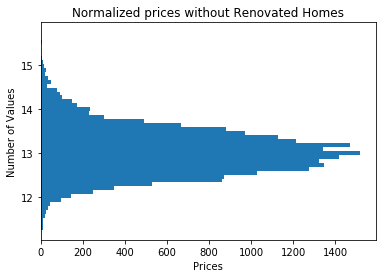

In [62]:
plt.title('Normalized prices without Renovated Homes')
plt.ylabel('Number of Values')
plt.xlabel('Prices')
plot_hor_function(log_nren_price, 50)

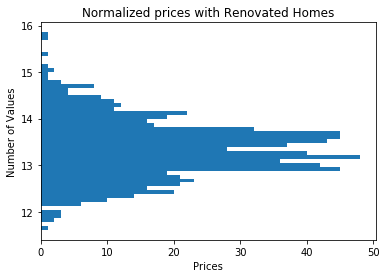

In [63]:
plt.title('Normalized prices with Renovated Homes')
plt.ylabel('Number of Values')
plt.xlabel('Prices')
plot_hor_function(log_ren_price, 50)

Based on the visualizations and the summary statistics of the data, the homes that are not renovated tend to have a lower average price and overall lower price range than those that are renovated.  

In [64]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

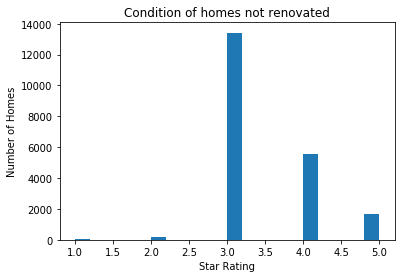

In [101]:
plt.title("Condition of homes not renovated")
plt.xlabel('Star Rating')
plt.ylabel('Number of Homes')
plot_function(df[rn]['condition'], 20)

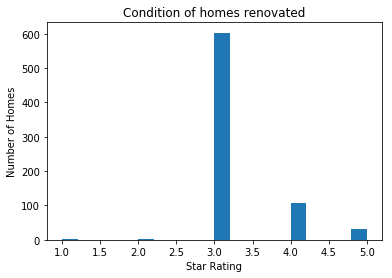

In [67]:
plt.title("Condition of homes renovated")
plt.xlabel('Star Rating')
plt.ylabel('Number of Homes')
plot_function(df[~rn]['condition'], 20)

The data does seem to be telling us about an interesting contrast of information. Houses that were not renovated on average sell for less but have a higher average condition by about .2 stars. This subverts the idea that a more expensive home tends to lead to a better condition of housing, without digging deeper down the hole on this I would think that the renovation has something to do with this price increase but I don't have data to back up it's significance on it as that is not the question being asked.

### Model
Now that we have a good idea about the information subverting our expectations, let's see if the variables of price and condition actually tie together at all for both renovated and not renovated homes.

In [68]:
# The not renovated variables
nren_price = df[rn]['price']
nren_condition = df[rn]['condition']

# The renovated variables
ren_price = df[~rn]['price']
ren_condition = df[~rn]['condition']

What we'll do is take the lienear regression of both with and without a constant so we'll have four total summaries of results. The two below this paragraph are the ones that deal with houses that are not renovated.

In [70]:
linreg_fxn(nren_price, nren_condition)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 4.405e+04
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        01:18:33   Log-Likelihood:            -2.9647e+05
No. Observations:               20853   AIC:                         5.929e+05
Df Residuals:                   20852   BIC:                         5.930e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
condition   1.511e+05    719.867    209.888      0.0

In [71]:
linreg_wconstant(nren_price, nren_condition)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     40.91
Date:                Fri, 17 May 2019   Prob (F-statistic):           1.63e-10
Time:                        01:18:35   Log-Likelihood:            -2.9588e+05
No. Observations:               20853   AIC:                         5.918e+05
Df Residuals:                   20851   BIC:                         5.918e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.507e+05    1.3e+04     34.792      0.0

The following two are the linear regressions that deal with the renovated homes.

In [72]:
linreg_fxn(ren_price, ren_condition)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     1070.
Date:                Fri, 17 May 2019   Prob (F-statistic):          4.13e-146
Time:                        01:18:38   Log-Likelihood:                -10996.
No. Observations:                 744   AIC:                         2.199e+04
Df Residuals:                     743   BIC:                         2.200e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
condition   2.337e+05   7143.408     32.718      0.0

In [73]:
linreg_wconstant(ren_price, ren_condition)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6971
Date:                Fri, 17 May 2019   Prob (F-statistic):              0.404
Time:                        01:18:39   Log-Likelihood:                -10986.
No. Observations:                 744   AIC:                         2.198e+04
Df Residuals:                     742   BIC:                         2.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.501e+05   1.44e+05      4.509      0.0

### Recommendation
Well the data is twofold very telling for our question. We know that renovated homes are on average more expensive and have lesser conditions, which is proves that our hypothesis that renovated homes yield a better condition is not true. And with our models we also found out that niether the price or the condition of the home have a high correlation so there must be other values that dictate these changes moreso.

This does provide the realtor with isnight that would otherwise be assumed to be true. Most people would assume that a household that is renovated has a higher rating but it is not always the case and that renovating the house increases its rating which it has shown to not be true either.

Anyone using this data may now provide buyers with the knowledge that just because the house was renovated doesn't mean it may be right for them if they're looking for a five star home. It may be cheaper and better to go with one that wasn't renovated at all.

# Question_3

## What is the relationship of the square footage of the property to price?

First thing I want to do is to make it clear that I am looking for the overall property size including the yard and outdoor space and not the house itself. 

Since the area of King County is the most populous county in Washington since it is where Seattle is located but does owning a yard have any relationship with the price?

Below I have checked for the price relative to the house and the overall property.

### Visualization

In [175]:
df3 =[]
df3 = df[['price', 'sqft_living', 'sqft_lot']]
df3.describe()

,price,sqft_living,sqft_lot
count,2.159700e+04,21597.000000,2.159700e+04
mean,5.402966e+05,2080.321850,1.509941e+04
std,3.673681e+05,918.106125,4.141264e+04
min,7.800000e+04,370.000000,5.200000e+02
25%,3.220000e+05,1430.000000,5.040000e+03
50%,4.500000e+05,1910.000000,7.618000e+03
75%,6.450000e+05,2550.000000,1.068500e+04
max,7.700000e+06,13540.000000,1.651359e+06


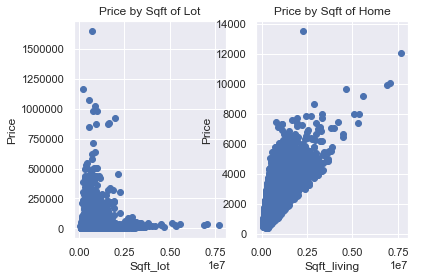

In [184]:
y = df['price']
x = df['sqft_lot']
z = df['sqft_living']

# Scatter plot of price compared to total lot
plt.subplot(121)
plt.title('Price by Sqft of Lot')
plt.xlabel('Sqft_lot')
plt.ylabel('Price')
plt.scatter(y, x)

#  Scatter plot of price copared to house size
plt.subplot(122)
plt.title('Price by Sqft of Home')
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.scatter(y, z)

plt.show()

In [190]:
log_sqft_lot = np.log(df['sqft_lot'])
log_sqft_living = np.log(df['sqft_living'])
log_price = np.log(df['price'])

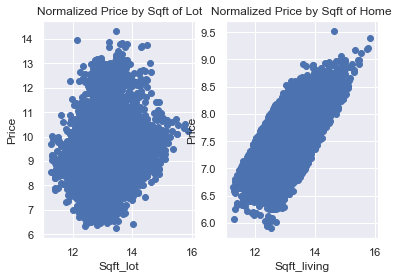

In [193]:
plt.subplot(121)
plt.title('Normalized Price by Sqft of Lot')
plt.xlabel('Sqft_lot')
plt.ylabel('Price')
plt.scatter(log_price, log_sqft_lot)

plt.subplot(122)
plt.title('Normalized Price by Sqft of Home')
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.scatter(log_price, log_sqft_living)

### Model
Undernearth we will try to take the linear regression of both price and square feet of property vs price and square feet of house both with and without a constant. The reason I am sharing the comparision to square feet of house is to give an idea of what is considered one of the most positively correlated sets of values.

In [198]:
linreg_fxn(log_price, log_sqft_lot)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.041e+06
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        04:33:08   Log-Likelihood:                -36905.
No. Observations:               21597   AIC:                         7.381e+04
Df Residuals:                   21596   BIC:                         7.382e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sqft_lot       1.4378      0.001   1428.606      0.0

In [200]:
linreg_wconstant(log_price, log_sqft_lot)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     420.9
Date:                Fri, 17 May 2019   Prob (F-statistic):           1.21e-92
Time:                        04:33:38   Log-Likelihood:                -16584.
No. Observations:               21597   AIC:                         3.317e+04
Df Residuals:                   21595   BIC:                         3.319e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3227      0.036    346.695      0.0

In [201]:
linreg_fxn(log_price, log_sqft_living)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.254e+07
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        04:33:58   Log-Likelihood:                -17397.
No. Observations:               21597   AIC:                         3.480e+04
Df Residuals:                   21596   BIC:                         3.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     1.7253      0.000   3540.998      

In [203]:
linreg_wconstant(log_price, log_sqft_living)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        04:34:05   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7234      0.047    142.612      

### Recommendation
Well the data does not lie and while it would be very lofty to even say that price and square feet of the house is highly correlated, we can without a doubt say that price has a very low correlation with square feet of the property. 

What this means is that there really is not a lot to work with in determining whether a property that is large has anything to do with the price. And after looking into Cook County in greater detail you notice that since it does encompass Seattle that it probably has many expensive homes with little to no extra property around the house so this data may only be relevant for this county since it holds a major city.

I would recommend trying to avoid using aspects like a yard as a solid indicator of a more expensive home. It does not seem to hold any validity so I would recommend staying with overall size of the home and not property.

# Conclusion

Over the three primary questions that I asked I had focused primarily on the value that the realtor would gain from knowing the answers for potential buyers. While the data held a lot of information I had focused in on questions that were aimed to prove or disprove common beliefs that the average buyer would have and while this is not an exhaustive list of questions they would have it does provide results for some of them.

With these questions answered the realtors of King County will now have a better grasp on some overarching questions they would recieve. 

I'd like to thank you for your time in going over the questions and their results. Have a great day.